In [6]:
%matplotlib inline
import sys
import pandas
import numpy
import sqlite3 as lite
from pandas.io import sql
import os
import matplotlib.pyplot as plt

In [7]:
# Open connect to database
con = lite.connect('geneSequenceResults.db');
cur = con.cursor() 

In [8]:
gene_pairs = pandas.read_sql("select * from gene_pairs", con=con)
geneid = 'ZYX|7791'
# geneid = sys.argv[1]
samples_of_geneid = gene_pairs[gene_pairs['geneid']==geneid].set_index('sample').drop('geneid',axis=1).astype(float)
samples_of_geneid["diff_normcount"] = samples_of_geneid.diff(axis=1)[samples_of_geneid.columns[-1]]

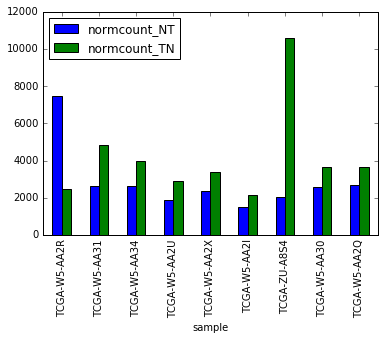

In [9]:
# Bar graph of NT and TN normcounts for specified Gene ID

samples_of_geneid[['normcount_NT','normcount_TN']].plot(kind='bar')

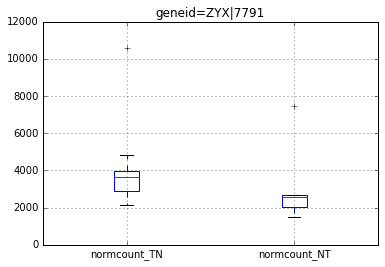

In [16]:
samples_of_geneid.boxplot(return_type='axes')
plt.title("geneid=" + geneid)

{'boxes': [<matplotlib.lines.Line2D at 0x111b67290>],
 'caps': [<matplotlib.lines.Line2D at 0x111ba6090>,
 'fliers': [<matplotlib.lines.Line2D at 0x111bd5390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x111ba6d10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x111b67390>,
  <matplotlib.lines.Line2D at 0x111b67a10>]}

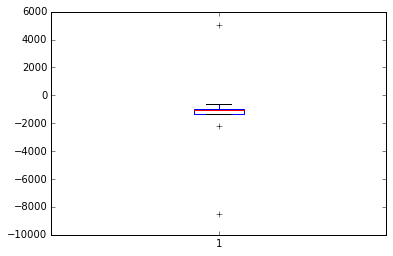

In [20]:
plt.boxplot(samples_of_geneid["diff_normcount"])

In [5]:
# Commit to the changes and close connection to geneSequenceResults.db
#con.commit()
con.close()